# Linear regression

In [161]:
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 


/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [140]:
titanic=sns.load_dataset('titanic')

In [124]:
iris=sns.load_dataset('iris')

In [125]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [127]:
irisex=iris[iris['species']!='setosa']

In [128]:
LE = LabelEncoder()
iris['species']=LE.fit_transform(iris['species'])

In [129]:
y,x=(iris['species']),iris[['petal_length','sepal_length']]

In [130]:
lm=sm.OLS(y.astype(float),x.astype(float))

In [131]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                species   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     1954.
Date:                Fri, 22 May 2020   Prob (F-statistic):          4.01e-107
Time:                        21:40:28   Log-Likelihood:                -2.8536
No. Observations:                 150   AIC:                             9.707
Df Residuals:                     148   BIC:                             15.73
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
petal_length     0.5047      0.015     32.738      0.000       0.474       0.535
sepal_length    -0.1536      0.011    -14.174      0.000      -0.175      -0.132
==============================================================================
Omnibus:                        0.986   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                1.036
Skew:                          -0.098   Prob(JB):                        0.596
Kurtosis:                       2.643   Cond. No.                         6.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
lm.predict()

TypeError: predict() missing 1 required positional argument: 'params'

Text(0.5,1,'OLS Regression')

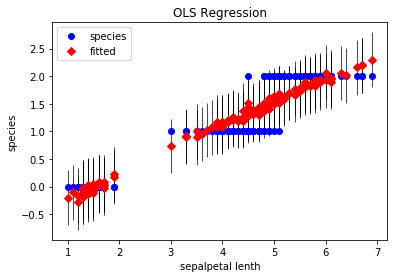

In [132]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(result, 0, ax=ax)
ax.set_ylabel("species")
ax.set_xlabel("sepalpetal lenth")
ax.set_title("OLS Regression")

Text(0.5,1,'OLS Regression')

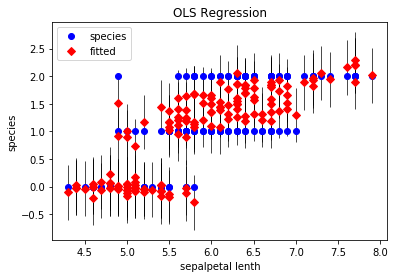

In [98]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(result, 1, ax=ax)
ax.set_ylabel("species")
ax.set_xlabel("sepalpetal lenth")
ax.set_title("OLS Regression")

# Logistic Regression

In [141]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [154]:
titanic['intercept']=1
log=sm.Logit(titanic['survived'],titanic[['intercept','pclass','fare']]).fit()

Optimization terminated successfully.
         Current function value: 0.604357
         Iterations 5


In [155]:
log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      888
Method:                           MLE   Df Model:                            2
Date:                Fri, 22 May 2020   Pseudo R-squ.:                 0.09244
Time:                        23:56:34   Log-Likelihood:                -538.48
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 1.517e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8971      0.295      3.042      0.002       0.319       1.475
pclass        -0.6840      0.107     -6.383      0.000      -0.894      -0.474
fare           0.0055      0.002      2.454      0.014       0.001       0.010
==============================================================================
"""

In [160]:
np.exp(-0.6840), np.exp(0.0055)

(0.5045945719335512, 1.0055151527673363)

# Scikit logistic regressoin

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split

In [171]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,intercept
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


In [177]:
y=titanic['survived']
x=titanic[['pclass','fare']]

In [192]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [193]:
logreg=LogisticRegression()

In [194]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [195]:
y_pred=logreg.predict(X_test)

In [196]:
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred),"Accuracy Score")

[[122  17]
 [ 48  36]]
0.6792452830188679
0.42857142857142855
0.7085201793721974 Accuracy Score
